# Day 3 Sandbox and outline

1. PCA Basics with some 2D MVN data - intuition and linalg
1. PCA for dimensionality reduction
1. Show variance accounted for
1. Stock data - look at it, PCA, think


Other skills

1. Making plots for presentations (and generally making the plots nice)
1. Other resources
1. Ask us whatever questions you still have



sdf

1. Plots for presentations
2. PCA intution (2D MVN)
3. Dimensinoality reduction exmple + exercises  
    1. variance explained
4. Stock Example as exercise (until 8ish)
5. Other resources
6. Talking about whatever

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#These are some matplot lib configurations that I like to use. 
mpl.rc("text", usetex=False) #if tou have Latex set this to true and matplotlib will render labels in latex
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111",
                     "savefig.facecolor": "212121"})

In [ ]:
test = np.loadtxt('individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv',
                  delimiter=',',skiprows=1,usecols=1,encoding='UTF-8')

In [3]:
import glob

In [4]:
#Download the data from https://www.kaggle.com/camnugent/sandp500 (you may need to make a kaggle account...)
sp500_glob = glob.glob('individual_stocks_5yr/individual_stocks_5yr/*.csv',)
names = []
prices = np.zeros((len(sp500_glob), test.shape[0]))
fails = []
for i,f in enumerate(sp500_glob):
    fname = f.split('/')[-1]
    names.append(fname.split('_')[0])
    try:
        prices[i] = np.loadtxt(f, delimiter=',',skiprows=1, usecols=1,encoding='UTF-8')
    except:
        fails.append(fname.split('_')[0])
        pass

In [5]:
price_changes = np.diff(prices)
# Below is a pretty standard way of normalizing numerical data
normalized_price_changes = (price_changes - price_changes.mean())/(price_changes.std())

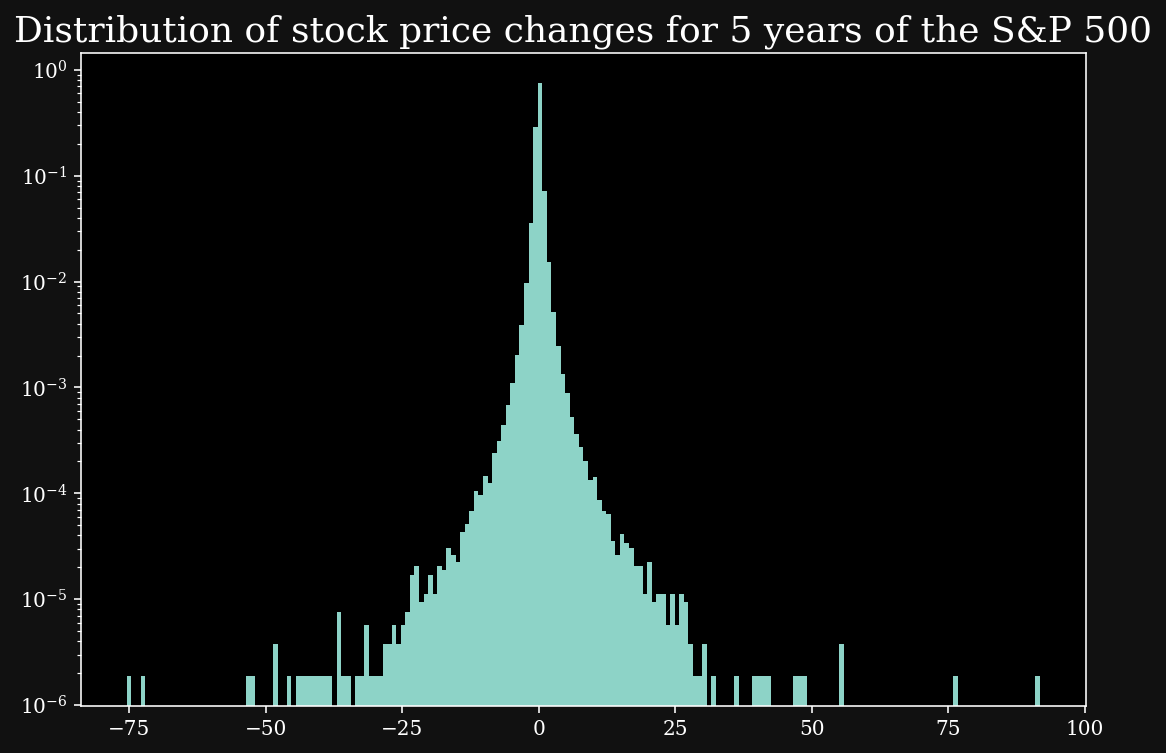

In [49]:
plt.hist(nor)

In [36]:
covariance = np.cov(price_changes)

In [50]:
evals, evecs = np.linalg.eigh(covariance)

In [7]:
n_pts = 1921
h = 24/n_pts
xx = np.linspace(-12,12,n_pts)

In [13]:
K = np.diag((2/h**2)*np.ones(n_pts)) - np.diag((1/h**2)*np.ones(n_pts-1),1) - np.diag((1/h**2)*np.ones(n_pts-1),-1)

V = np.diag(np.abs(xx))
H = K+V
H[0] = np.zeros(n_pts)
H[-1] = np.zeros(n_pts)

In [14]:
energies, states = np.linalg.eigh(H)

In [18]:
energies[2:8]

array([1.01912865, 2.33890495, 3.24929305, 4.08932524, 4.82170899,
       5.52239718])

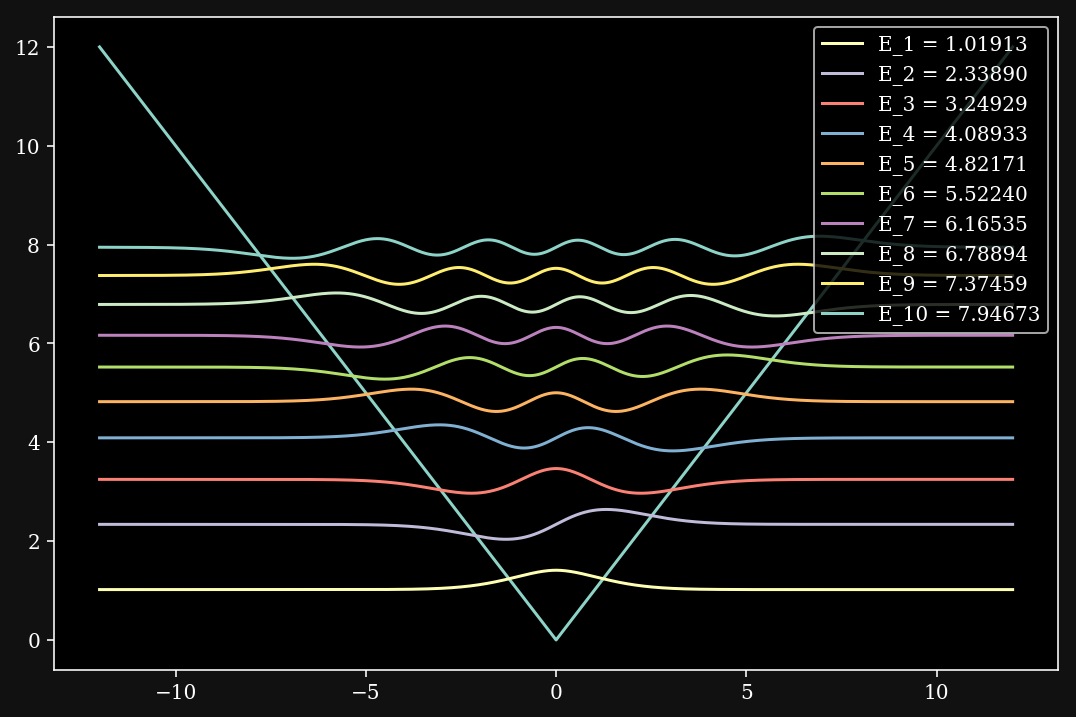

In [30]:
plt.plot(xx,np.abs(xx))
for i in range(2,12):
    plt.plot(xx, 5*states[:,i]+energies[i],label=f'E_{i-1} = {energies[i]:0.5f}')
plt.legend()
plt.show()
    

In [42]:
np.random
mean = np.array([4.5,3])
cov = np.array([[9, 5],
                [5, 8]])
vals, vecs = np.linalg.eigh(cov)

In [43]:
pts = np.random.multivariate_normal(mean, cov, size=300)

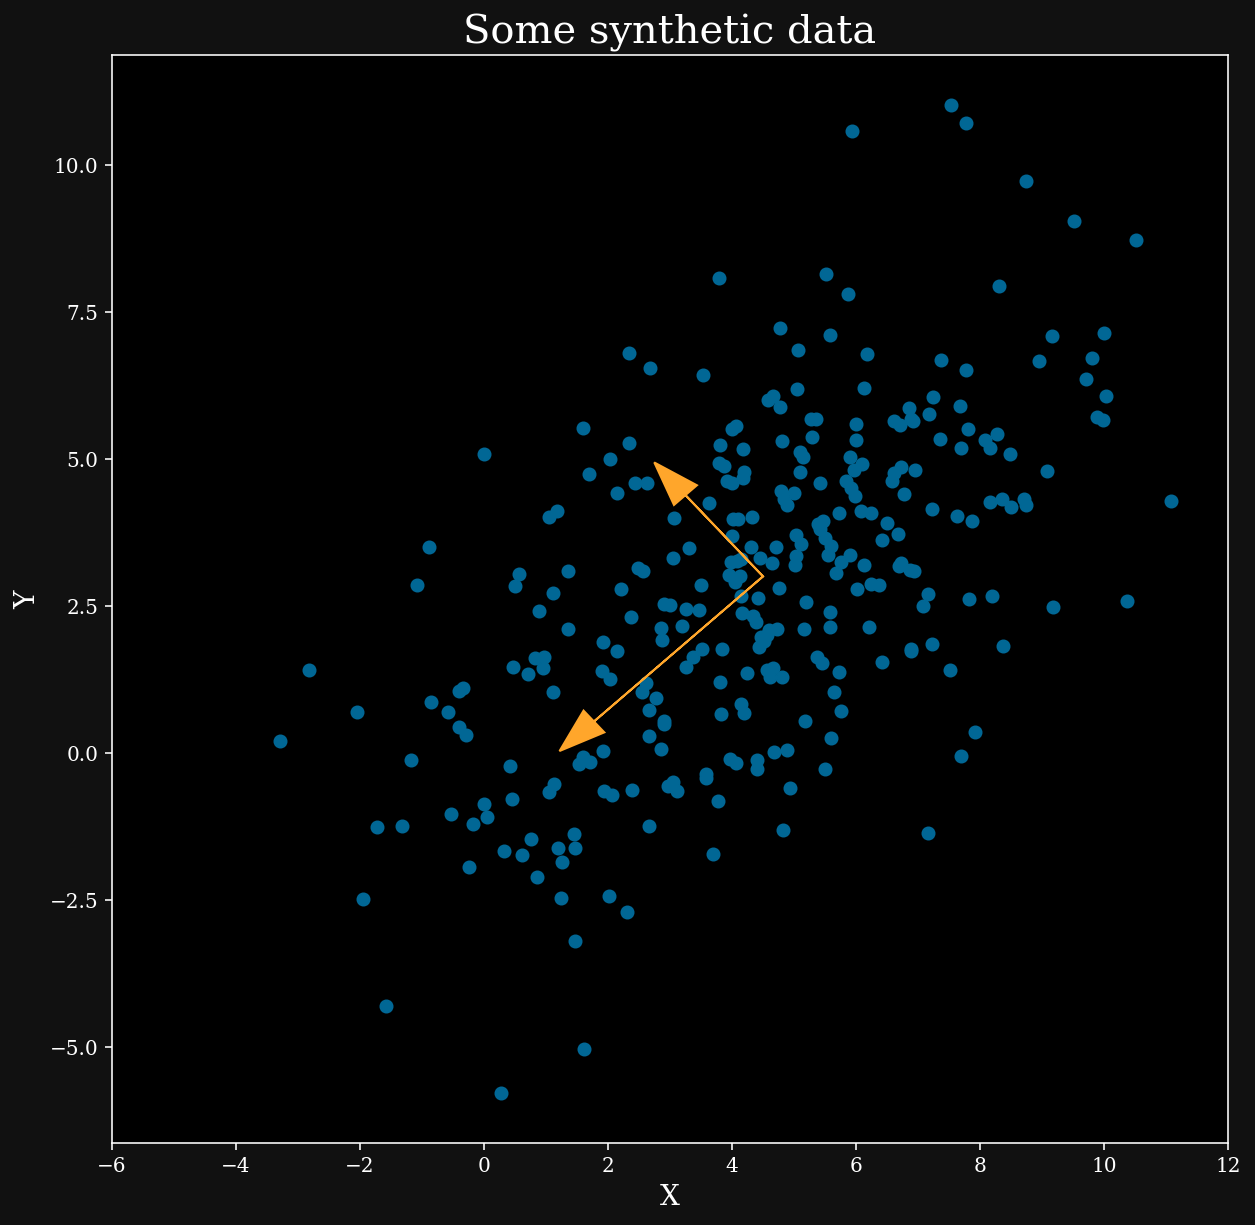

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(pts[:,0],pts[:,1], c='xkcd:peacock blue')
plt.title("Some synthetic data", fontsize=20)
plt.xlim([-5,13])
plt.xlim([-6,12])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.arrow(mean[0],mean[1],-np.sqrt(vals[0])*vecs[0,0],-np.sqrt(vals[0])*vecs[1,0],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.arrow(mean[0],mean[1],np.sqrt(vals[1])*vecs[0,1], np.sqrt(vals[1])*vecs[1,1],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.show()

In [78]:
transformed = pts@(vecs[:,::-1])

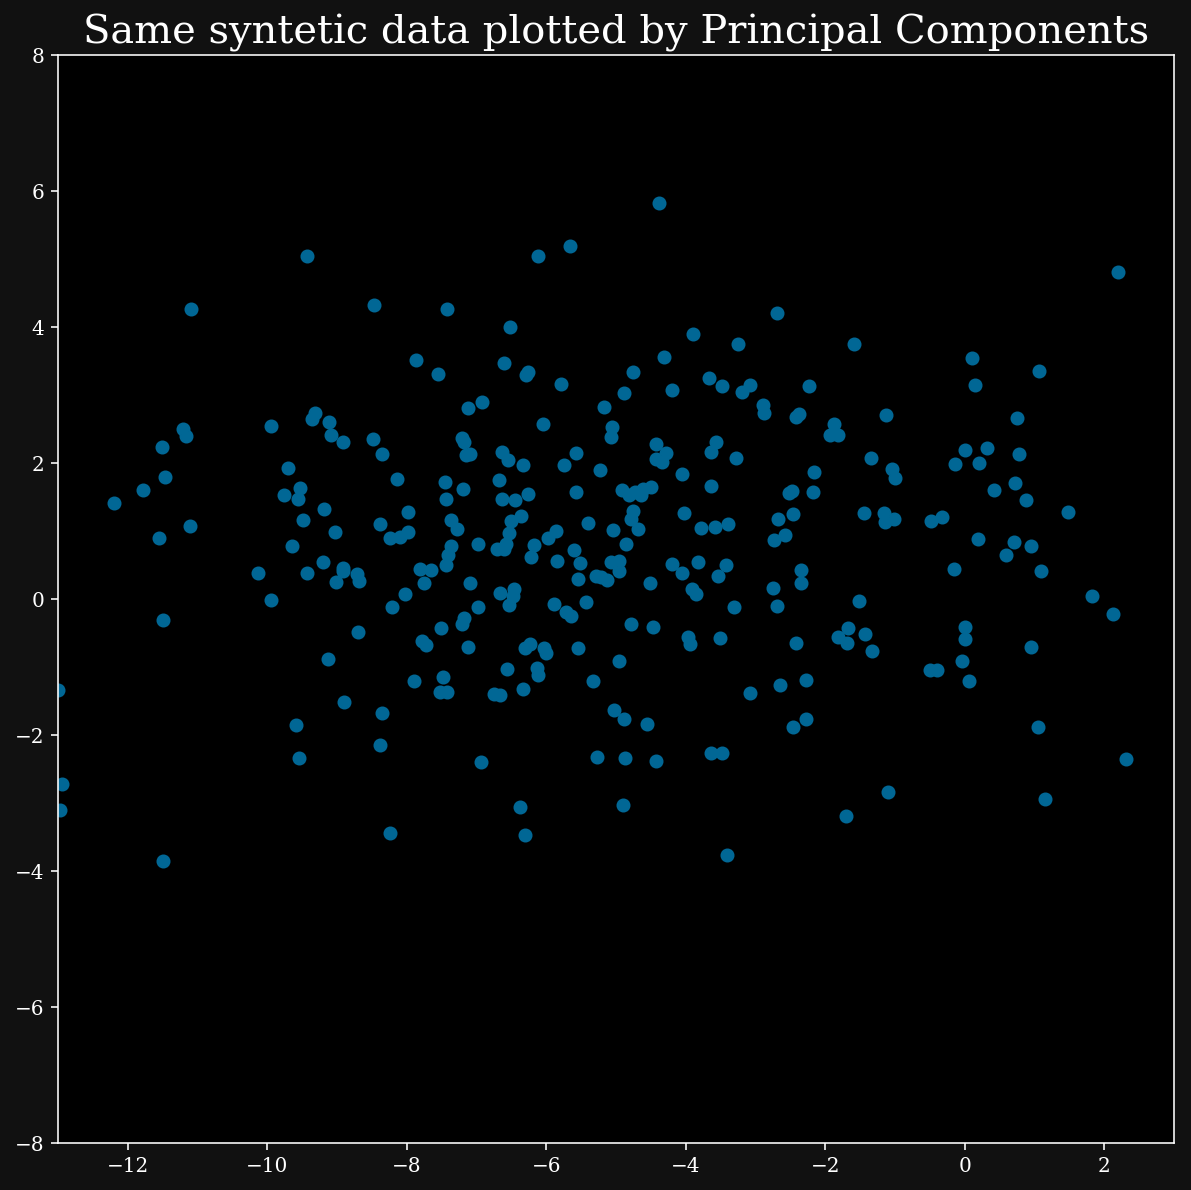

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0], transformed[:,1],c='xkcd:peacock blue')
plt.title("Same syntetic data plotted by Principal Components", fontsize=20)
plt.ylim([-8,8])
plt.xlim([-13,3])
plt.show()

In [75]:
vecs

array([[ 0.67100532, -0.74145253],
       [-0.74145253, -0.67100532]])

In [77]:
vecs[:,::-1]

array([[-0.74145253,  0.67100532],
       [-0.67100532, -0.74145253]])